# Hdf5, images and numpy arrays

#### In this exercise, you will learn to read some data from a custom made hdf5 file, plot the data, and obtain some useful statistics.

In [1]:
# some things we need in general for this exercise
import numpy as np
import matplotlib.pyplot as plt

# some things needed to read. we're using hdf5
import h5py

%matplotlib notebook 

### Exercise 1:
    - Read data from an hdf5 file
    - use the h5py library to read data from an hdf5 that has the following structure:
        - img: the image (a 2d numpy array)
        - mask : the mask for the image (a 2d numpy array)
        - attributes/
            - x0 : the beam center in x
            - y0 : the beam center in y
            - more keys...

Try it yourself by exploring the following commands:
```py
f = h5py.File(filename)
img = f['img'].value
import matplotlib.pyplot as plt
plt.ion()
plt.imshow(img)

attributes = f['attributes']
print(list(attributes.keys()))

d = dict()
for key in attributes:
    d[key] = attributes[key].value
```

Now try to make a function that returns
(img, mask, attributes)

See the solution if you would rather move on

In [2]:
# %load ../solutions/solution01-part01.py
# SOLUTION
def read_data(filename):
    '''
        Reads data from hdf5 file of data.

    '''
    # this is the way to open an hdf5 file for reading
    f = h5py.File(filename, "r")
    # accessing a data set is just like accessing as a dictionary
    mask = f['mask'].value
    img = f['img'].value
    # for groups (which are groups of data sets, we can access them the same
    # way)
    attributes = f['attributes']
    # we can grab all the keys from the attributes as so
    keys = attributes.keys()
    # note that this is an iterator, call list(keys) to see the keys
    # we'll do it here just to be explicit (but this step is not necessary)
    keys = list(keys)

    md = dict()
    # iterate over the keys
    for key in keys:
        # access the attribute like a dictionary
        # alternately, this also works: f['attributes/beam_center_x'] etc
        # (but the current implementation is simpler)
        md[key] = attributes[key].value

    return img, mask, md

# if running from the notebooks directory:
img, mask, md = read_data("../data/00000000.hd5")


### Exercise 2

Look at the image, explore it.


Use commands like:
    
```
    plt.figure() # select a figure
    plt.imshow(img)
```

play with the max and min in the colorscale:
```
plt.clim(0,100)
```

In [3]:
# try it yourself here




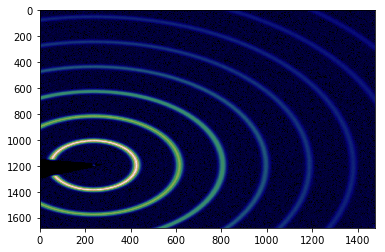

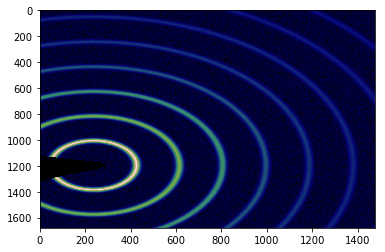

In [4]:
# %load ../solutions/solution01-part02.py
plt.figure(2);


plt.clf(); # clear figure in case it's been drawn before
plt.imshow(img)

# use mask to mask out bad pixels
plt.figure(3);
plt.clf(); # clear figure in case it's been drawn before
plt.imshow(img*mask)

Exercise 3: Plot rings around the mask.

    - First, use the information md['x0'] and md['y0'] to plot the beam center
    - Second, try to plot rings around the beam center. Do they seem to match
    the data?
    
Hints, to plot a ring of radius 1:
```
phi = np.linspace(0, 2*np.pi, 1000)
plot(np.cos(phi), np.sin(phi))
```

How about a ring of radius 10, 100, 200, 300, 400, 500?

How about a ring centered at (10,10)?


In [5]:
# try it yourself here

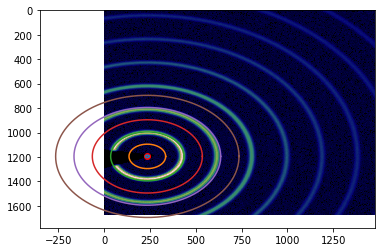

In [6]:
# %load ../solutions/solution01-part03.py
# SOLUTION

x0, y0 = md['x0'], md['y0']

plt.figure(4);
plt.clf()
plt.imshow(img)

# plot the beam center
plt.plot(x0, y0, 'ro')
# create phi
phi = np.linspace(0, 2*np.pi, 1000)
# now plot phi for a certain radius
for r in [10, 100, 200, 300, 400, 500]:
    plt.plot(r*np.cos(phi) + x0, r*np.sin(phi) + y0)

### Exercise 4: Rings look good? Great! Let's learn about binning data.

#### Each pixel in an image is part of a certain radius.
Before we begin, we'll start by constructing a coordinate system.

Create two arrays the same shape as the image, where 1 array reflects the x coordinates of the array, and the other the y coordinates.

The coordinates in the array are indexed by:
```
img[i,j]
```
where `i` refers to the y coordinate (the rows) and `j` the x coordinate (the columns)
When plotting an image in matplotlib using `imshow`, the rows are plotted along the y-axis (up-down)
and the columns are plotted along the x axis (left-right).
This is how matrices in general are laid out on paper.

You'll want to create a 1 d list of x and y. Use `np.arange` and information from `img.shape` to create a list of `x` and `y` where `x` is the number of columns in the image and `y` the number of rows.

In [7]:
# create the 1 dimensional coordinates
x = np.arange(img.shape[1])
y = np.arange(img.shape[0])



Now we need to shift the origin of the data.

Since x is an array, we need to subtract an array from it.

It turns out, that if you subtract a constant from an array, numpy will upgrade it to an array for you
this is called "broadcasting"

See here for all the broadcasting rules:
https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [8]:
# shift the data to the origin
x = x - x0
y = y - y0

# this is the same as:
xp = np.zeros(x.shape)
for i in range(len(x)):
    xp[i] = x[i] - x0
    
# but where the latter code `x = x - x0` is *much* faster.

Now let's create a grid of x and y coordinates.

Try to use `np.meshgrid` to accomplish this.

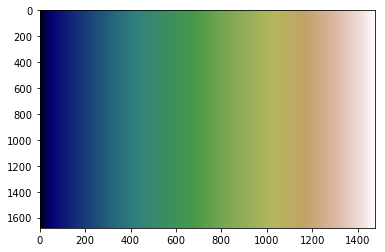

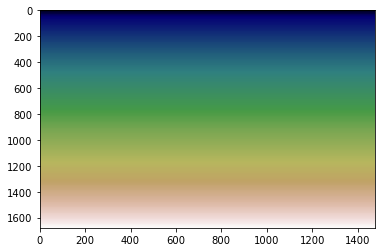

In [9]:
X, Y = np.meshgrid(x, y)

# this can also be accomplished with np.tile:
X = np.tile(x[np.newaxis, :], (img.shape[0], 1))
Y = np.tile(y[:, np.newaxis], (1, img.shape[1]))
# see docs on np.tile for more details

plt.figure(6);
plt.clf()
plt.imshow(X)
plt.figure(7);
plt.clf()
plt.imshow(Y)

### Exercise 4: Get a radius coordinate

Now that we have the x and y coordinates of the detector, we want to obtain the radius coordinate.

Use the `np.sqrt` and `np.arctan2` functions to transform the X and Y coordinates to a radius.

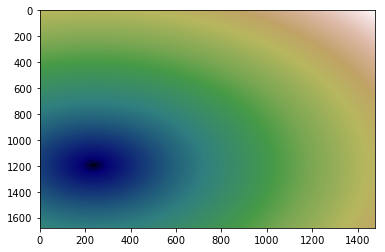

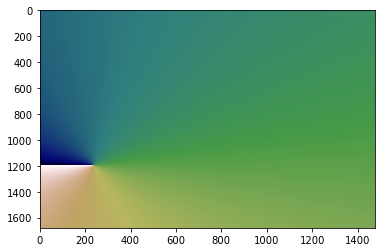

In [10]:
R = np.sqrt(X**2 + Y**2)
PHI = np.arctan2(Y, X)

fix, ax = plt.subplots()
ax.imshow(R)

fig, ax = plt.subplots()
ax.imshow(PHI)

#### Digitize the pixels versus radius

Convert the pixels to a radius by rounding.

Hint: an easy way to round a number is `int(num +.5)`

For an array:
`(num + . 5).astype(int)`

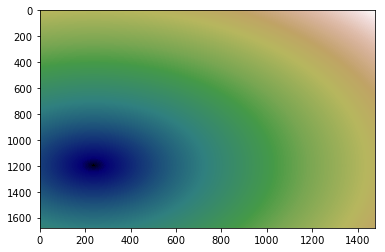

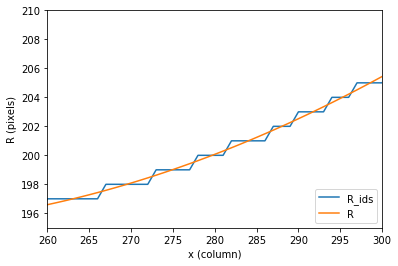

In [11]:
R_ids = (R+.5).astype(int)

fig, ax = plt.subplots()
ax.imshow(R_ids)

# plot a cross section to see that it is discretized
# compare to original R's
fig, ax = plt.subplots()
# print 1000th row
ax.plot(R_ids[1000, :], label="R_ids")
ax.plot(R[1000, :], label="R")
ax.set_xlim(260,300)
ax.set_ylim(195,210)
ax.set_xlabel("x (column)")
ax.set_ylabel("R (pixels)")
ax.legend()

# Now histogram using bincount
Look at `np.bincount?` to see what bincount requires.



In [12]:
#np.bincount?


Notice that when callling that, we see:

`x : array_like, 1 dimension, nonnegative ints`

The array must be 1-dimensional, but we are working with 2d arrays. To flatten an array into a 1 dimensional array, just call:
```
R.ravel()
```

What arguments should be supplied to R?

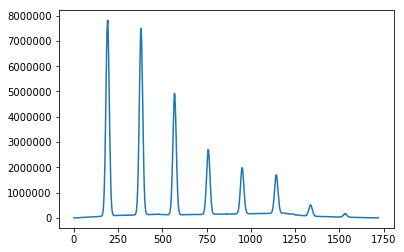

In [13]:
# get the intensity
i_r = np.bincount(R_ids.ravel(), weights=img.ravel())

fig, ax = plt.subplots()

# bincount looks for integers from 0 to max length of i_r
r = np.arange(len(i_r))
ax.plot(r, i_r)

#### That's great but it's not perfect. If you noticed the previous image, there were regions of masked data. We should ignore this in our statistics. We can use the following to select bad data:
```
w_good = np.where(mask > 0)
```

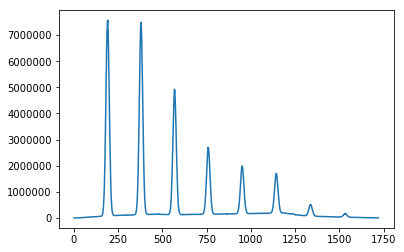

In [14]:
w_good = np.where(mask > 0)
i_r = np.bincount(R_ids[w_good].ravel(), weights = img[w_good].ravel())

fig, ax = plt.subplots()

# bincount looks for integers from 0 to max length of i_r
r = np.arange(len(i_r))
ax.plot(r, i_r)



#### We're still missing something. Do you see anything wrong in the calculation above?
Hint, we want:

$$i_r = \frac{1}{N_r} \sum \limits_{r_j \epsilon r} I_{r_j}$$
$$N_r = \sum \limits_{r_j \epsilon r} 1$$

We must divide the `i_r` array we created with another array. Do you know how to construct it? (Hint: use `np.bincount`)

Finally, to divide an array `A` by another `B` of the same shape, elementwise, just call:
```
A/B
```

Note: This is an element-wise operation. Elementwise means that the operation is performed to each element. For example, for two arrays:
```
A * B
```
This is the same as:
```
C = np.zeros_like(A)
for i in range(len(A.ravel())):
    C.ravel()[i] = A.ravel()[i] * B.ravel()[i]
```

where `ravel()` is used as a quick shortcut to reshape the array into a 1-dimensional array. `A.ravel()` returns a view into the same array, but is 1 dimensional only.

/home/lhermitte/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


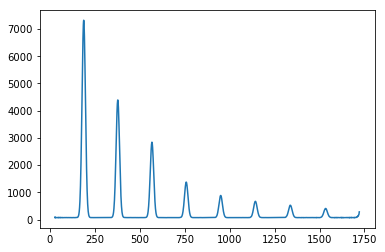

In [15]:
# we're missing the sum:
N_r = np.bincount(R_ids[w_good].ravel())

i_r = i_r/N_r

fig, ax = plt.subplots()

# bincount looks for integers from 0 to max length of i_r
r = np.arange(len(i_r))
ax.plot(r, i_r)



That looks much better!


What did we learn?
- Using h5py to read an hdf5 file
- Plotting 2D image data, and 1D data to better understand the trends
- Difference between rows and columns
- Using broadcasting to sum scalar data with arrays
- Using `np.where` to select subsets of data according to a condition
- Using mathematical operators like `/` to operate between arrays

### TODO: 
- Add poll: 
-- What do to next? curve fitting, histogramming, image processing
-- how useful was this?
-- other opinions?
- Move solutions to .py files and hide using %load
- Clean up the text headers